In [27]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/crux-ml-ws-2023-contest-2/sample_submission.csv
/kaggle/input/crux-ml-ws-2023-contest-2/train.csv
/kaggle/input/crux-ml-ws-2023-contest-2/test.csv


In [28]:
data = pd.read_csv('/kaggle/input/crux-ml-ws-2023-contest-2/train.csv')

In [29]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,46906,819.195,312.005016,192.610967,1.619871,0.786702,47360,244.382025,0.711927,0.990414,0.878342,0.783263,0.006652,0.001544,0.613501,0.993793,SIRA
1,34079,698.752,267.050685,162.927756,1.639074,0.792324,34540,208.304418,0.675420,0.986653,0.877103,0.780018,0.007836,0.001789,0.608429,0.997260,DERMASON
2,51453,891.790,360.178529,182.843773,1.969870,0.861565,52164,255.953110,0.708875,0.986370,0.813009,0.710628,0.007000,0.001101,0.504993,0.994770,HOROZ
3,44725,792.243,293.196459,194.903183,1.504318,0.747063,45258,238.632853,0.720906,0.988223,0.895454,0.813901,0.006556,0.001774,0.662435,0.996513,SIRA
4,52492,868.092,336.071881,199.217295,1.686961,0.805363,53087,258.524448,0.686682,0.988792,0.875329,0.769253,0.006402,0.001383,0.591751,0.998261,SIRA


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8166 entries, 0 to 8165
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8166 non-null   int64  
 1   Perimeter        8166 non-null   float64
 2   MajorAxisLength  8166 non-null   float64
 3   MinorAxisLength  8166 non-null   float64
 4   AspectRation     8166 non-null   float64
 5   Eccentricity     8166 non-null   float64
 6   ConvexArea       8166 non-null   int64  
 7   EquivDiameter    8166 non-null   float64
 8   Extent           8166 non-null   float64
 9   Solidity         8166 non-null   float64
 10  roundness        8166 non-null   float64
 11  Compactness      8166 non-null   float64
 12  ShapeFactor1     8166 non-null   float64
 13  ShapeFactor2     8166 non-null   float64
 14  ShapeFactor3     8166 non-null   float64
 15  ShapeFactor4     8166 non-null   float64
 16  Class            8166 non-null   object 
dtypes: float64(14)

In [31]:
print(data.columns)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


In [32]:
collumns=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class']
for i in collumns:
    print(data[i].value_counts())

44710     4
35354     4
30529     4
29709     4
28122     3
         ..
226806    1
51426     1
49925     1
78139     1
63628     1
Name: Area, Length: 7586, dtype: int64
668.346     2
727.312     2
766.629     2
793.339     2
1001.665    2
           ..
799.811     1
848.013     1
654.952     1
961.485     1
997.390     1
Name: Perimeter, Length: 8103, dtype: int64
349.459450    2
339.352567    2
375.047391    2
365.298096    2
384.236934    2
             ..
273.874297    1
354.188233    1
255.615578    1
228.847416    1
400.784151    1
Name: MajorAxisLength, Length: 8145, dtype: int64
202.934731    2
165.411442    2
172.787357    2
175.486384    2
190.177318    2
             ..
183.019214    1
224.654245    1
175.066950    1
154.666512    1
204.033966    1
Name: MinorAxisLength, Length: 8145, dtype: int64
1.722029    2
2.051566    2
2.170572    2
2.081632    2
2.020414    2
           ..
1.496424    1
1.576593    1
1.460102    1
1.479618    1
1.964301    1
Name: AspectRation, Lengt

<AxesSubplot:>

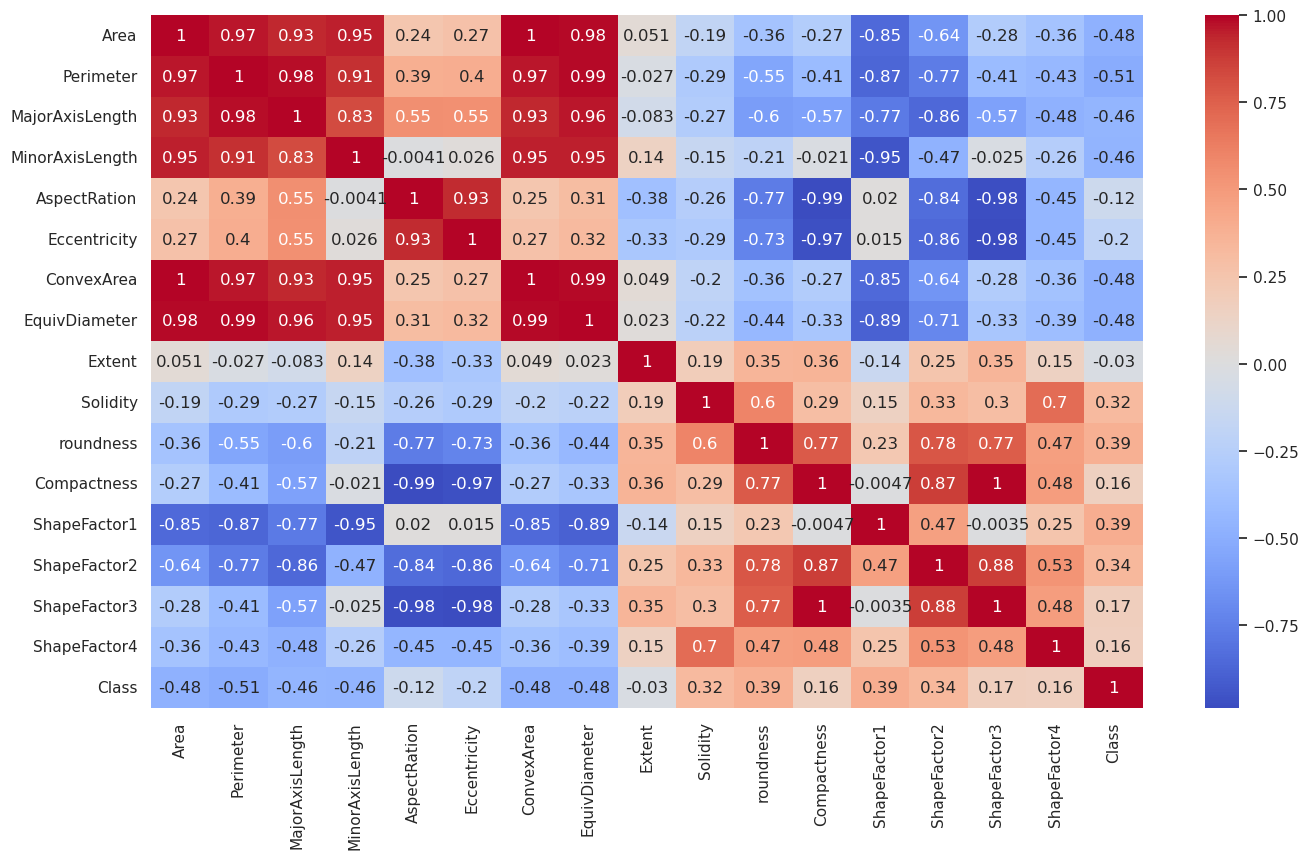

In [36]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(16,9)})
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [34]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Class']= label_encoder.fit_transform(data['Class'])
data['Class'].unique()

array([6, 3, 4, 5, 0, 2, 1])

In [23]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,46906,819.195,312.005016,192.610967,1.619871,0.786702,47360,244.382025,0.711927,0.990414,0.878342,0.783263,0.006652,0.001544,0.613501,0.993793,6
1,34079,698.752,267.050685,162.927756,1.639074,0.792324,34540,208.304418,0.675420,0.986653,0.877103,0.780018,0.007836,0.001789,0.608429,0.997260,3
2,51453,891.790,360.178529,182.843773,1.969870,0.861565,52164,255.953110,0.708875,0.986370,0.813009,0.710628,0.007000,0.001101,0.504993,0.994770,4
3,44725,792.243,293.196459,194.903183,1.504318,0.747063,45258,238.632853,0.720906,0.988223,0.895454,0.813901,0.006556,0.001774,0.662435,0.996513,6
4,52492,868.092,336.071881,199.217295,1.686961,0.805363,53087,258.524448,0.686682,0.988792,0.875329,0.769253,0.006402,0.001383,0.591751,0.998261,6


In [35]:
y = data['Class']
x = data.drop('Class',axis=1)
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X = minmax.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#decision trees
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators= 1000,min_samples_split= 2,
                                min_samples_leaf= 5,max_features= 'auto',max_depth= 50,
                               criterion= 'entropy')
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
print(accuracy_score(y_test,y_pred_rf))

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
parameters = {'n_estimators': [500], 
              'max_features': ['log2', 'sqrt','auto'], 
              #The number of features to consider when looking for the best split
              'max_depth': [50,80,100,150], 
              'min_samples_split': [5,7,9,11],
             }
grid_obj = GridSearchCV(model, parameters, scoring="neg_log_loss",n_jobs=4,cv = 5)
grid_obj = grid_obj.fit(x_train,y_train)
model_params = grid_obj.best_params_
model_params

In [38]:
#XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred_xg = xgb_model.predict(x_test)
print(accuracy_score(y_test,y_pred_xg))

0.9103819784524976


CatBoostError: catboost/libs/metrics/metric.cpp:6381: Max target greater than 1: 6

In [45]:
#Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
import sklearn.svm as svm
svc = SVC(gamma=0.22)
svc.fit(x_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(x_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.901077375122429


In [46]:
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(x_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(x_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.901077375122429
